In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np

top_dir = os.getcwd().split('ipython_nb')[0]
sys.path.append(top_dir+'xarray/')
#%%
import xarray as xr
sys.path.append(top_dir + '/v4cnn/common/')
import d_net_analysis as na

#%%
y_nm = 'bvlc_reference_caffenetpix_width[32.0]_x_(114.0, 114.0, 1)_y_(64, 164, 51)_amp_NonePC370.nc'
x_nm = 'bvlc_reference_caffenetpix_width[32.0]_x_(64, 164, 51)_y_(114.0, 114.0, 1)_amp_NonePC370.nc'



In [2]:
ti = []
k = []
for net_name in [y_nm, x_nm]:
    da = xr.open_dataset(top_dir + '/v4cnn/data/responses/'+ net_name)['resp'].squeeze()
    k.append(na.kurtosis_da(da))
    ti.append(na.ti_in_rf(da, stim_width=32))


/home/dean/Desktop//v4cnn/common/d_net_analysis.py:225: RuntimeWarning: invalid value encountered in double_scalars
  norm_cov = numerator/denominator


In [3]:
non_k_var = (k[0][1]<42) * (k[1][1]<42) * (k[0][0]<6) * (k[1][0]<6)

/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less_equal
/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater
/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less_equal
/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dean/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[array([ 0.23683001,  0.52685186]), array([ 0.20872653,  0.72575477]), array([ 0.19424946,  0.82704277]), array([ 0.23217554,  0.72113879]), array([ 0.27887981,  0.71434175]), array([ 0.31395637,  0.72311537]), array([ 0.44253094,  0.75636947]), array([ 0.58812865,  0.80576864]), array([ 0.7040397 ,  0.87152045]), array([ 0.82752501,  0.91959544])]


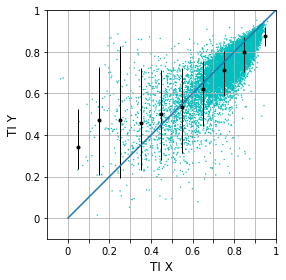

In [49]:
ti_x_f = ti[1][non_k_var]
ti_y_f = ti[0][non_k_var]
ti_x_f = np.ma.masked_invalid(ti_x_f)
ti_y_f = np.ma.masked_invalid(ti_y_f)

n_intervals = 10.
interval_space = 1/n_intervals
intervals = np.linspace(0, 1-interval_space, n_intervals)

c_means_x = []
c_means_y = []
c_sd_x = []
c_sd_y = []

for interval in intervals:
    cond_y = ti_y_f[(ti_x_f>interval)*(ti_x_f<=interval+interval_space)]
    cond_x = ti_x_f[(ti_y_f>interval)*(ti_y_f<=interval+interval_space)]
    c_means_x.append(cond_x.mean())
    c_means_y.append(cond_y.mean())
    c_sd_x.append(np.percentile(cond_x[np.isfinite(cond_x)], [5, 95]))
    c_sd_y.append(np.percentile(cond_y[np.isfinite(cond_y)], [5, 95]))


c_sd_y_err = np.ma.abs((np.array(c_sd_y) - np.array(c_means_y).reshape(n_intervals,1)).T)
c_sd_x_err = np.ma.abs((np.array(c_sd_x) - np.array(c_means_x).reshape(n_intervals,1)).T)

plt.axis('square')
fs = 12
plt.xlim(-0.1, 1)
plt.ylim(-0.1, 1)
plt.errorbar(intervals+interval_space/2, c_means_y, yerr=c_sd_y_err, color='k',fmt='.', lw=1)
plt.scatter(ti_x_f, ti_y_f, s=2,  c='c', edgecolors='none')
plt.xlabel('TI X', fontsize=fs)
plt.ylabel('TI Y', fontsize=fs)
plt.tight_layout()
print(intervals)
plt.xticks(np.linspace(0,1,11))
plt.gca().set_xticklabels(['0','','0.2','','0.4','','0.6', '','0.8','', '1'])
plt.yticks([0,0.2,0.4,0.6, 0.8, 1])
plt.gca().set_yticklabels(['0','0.2','0.4','0.6', '0.8', '1'])
plt.plot([0,1],[0,1])
#from matplotlib.ticker import AutoMinorLocator
#minor_locator = AutoMinorLocator(2)
#plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(True, which='both')
#beautify(plt.gca())
plt.savefig('/home/dean/Desktop/v4cnn/analysis/figures/images/v4cnn_cur/ti_x_vs_y.pdf' )
print(c_sd_y)

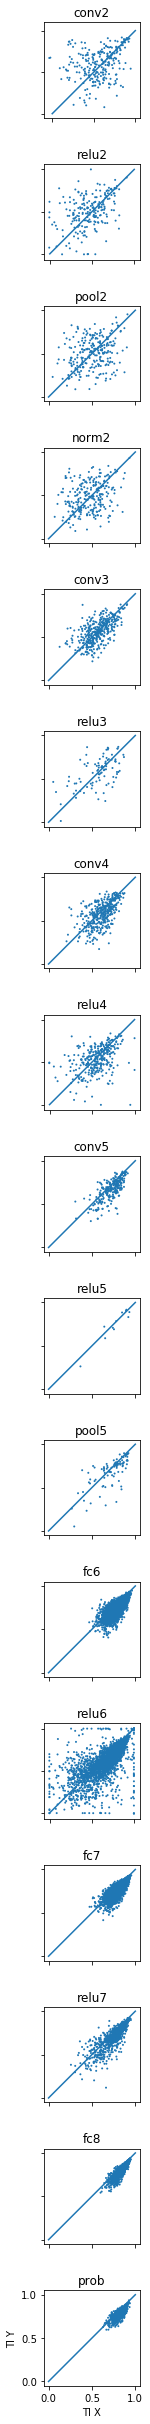

In [47]:
ti_x = ti[1]
ti_y = ti[0]
layers = da.coords['layer'].values
layer_labels = da.coords['layer_label'].values
n_plots = len(np.sort(np.unique(layers))[4:])
plt.figure(figsize=(2,2*n_plots))
for i, layer in enumerate(np.sort(np.unique(layers))[4:]):
    plt.subplot(n_plots, 1, i+1)
    layer_ind = layer == layers
    layer_label = layer_labels[layer_ind][0]
    plt.scatter(np.array(ti_x[layer_ind]), np.array(ti_y[layer_ind]),s=4, edgecolors='none')
    
    plt.plot([0,1],[0,1])
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    plt.axis('square')
    if i==n_plots-1:
        plt.xlabel('TI X')
        plt.ylabel('TI Y')
        plt.title(layer_label)
        plt.xticks([0,0.5,1])
        plt.yticks([0,0.5,1])

    else:
        plt.title(layer_label)
        plt.xticks([]);plt.yticks([])
        plt.xticks([0,0.5,1])
        plt.yticks([0,0.5,1])
        plt.gca().set_yticklabels(['','',''])
        plt.gca().set_xticklabels(['','',''])

plt.tight_layout()
        
  

In [21]:
ti[1]

<xarray.DataArray (unit: 22096)>
array([        nan,         nan,         nan, ...,  0.75407045,
        0.8367394 ,  0.90743666])
Coordinates:
    layer        (unit) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    scale        float64 8.41
    layer_unit   (unit) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    layer_label  (unit) |S5 'conv1' 'conv1' 'conv1' 'conv1' 'conv1' 'conv1' ...
    y            float64 114.0
  * unit         (unit) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...

In [22]:
np.unique(layers)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])